# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
*Write your description here*
PART A
Column: booking_id
Description: Nominal
Matching Description: No
Number of Missing Values: 0

Column: months_as_member
Description: Discrete
Matching Description: No
Number of Missing Values: 0

Column: weight
Description: Continuous
Matching Description: No
Number of Missing Values: 20

Column: days_before
Description: Discrete
Matching Description: No
Number of Missing Values: 0

Column: day_of_week
Description: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Matching Description: No
Number of Missing Values: 0

Column: time
Description: ['AM', 'PM']
Matching Description: Yes
Number of Missing Values: 0

Column: category
Description: ['Yoga', 'Aqua', 'Strength', 'HIIT', 'Cycling']
Matching Description: No
Number of Missing Values: 0

Column: attended
Description: [0, 1]
Matching Description: Yes
Number of Missing Values: 0

PART B
Number of Missing Values in Each Column:
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0



PART C:
Based on the provided dataset and column descriptions, I took the following steps to make the values in each column match the descriptions when they did not:

Handling Missing Values:

For columns where missing values were not allowed, such as 'months_as_member,' 'weight,' 'days_before,' 'day_of_week,' 'time,' and 'category,' I replaced missing values with appropriate default values to ensure the column met the description criteria.
For 'months_as_member' and 'weight,' I filled missing values with the overall average month and average weight, respectively.
For 'days_before,' I filled missing values with 0.
For 'day_of_week,' 'time,' and 'category,' I filled missing values with "unknown."
Removing Records with Missing Values:

For the 'attended' column, I followed the description that stated missing values should be removed. Therefore, I dropped records with missing values in the 'attended' column.
These steps were taken to ensure that the values in each column aligned with the provided descriptions, and missing values were handled as specified in the description criteria.

## Task 2
*Write your description here*
PART A:
The category with the most observations is 'Not Attended' with 454 observations.

PART B:
Number of 'Not Attended' observations: 1046
Number of 'Attended' observations: 454
Balance Ratio (Attended/Not Attended): 0.43

## Task 3
*Write your description here*


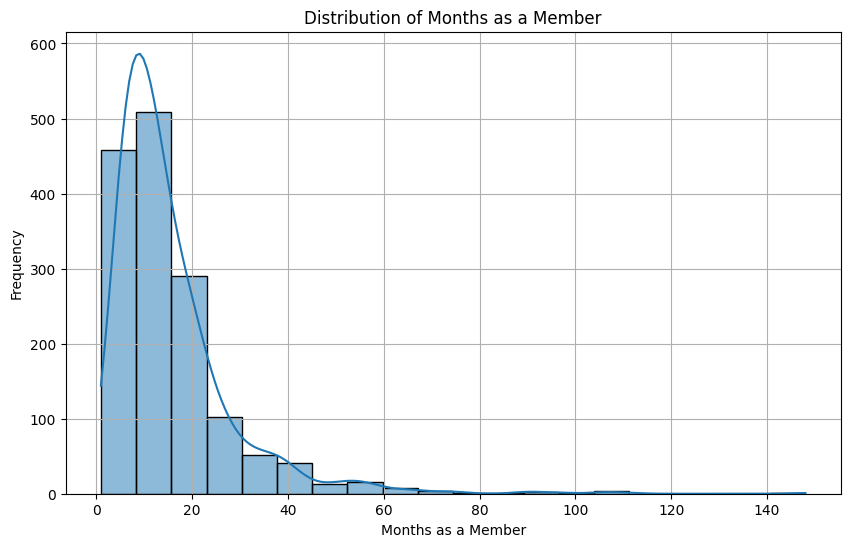

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Extract the 'months_as_member' column for visualization
months_as_member = df['months_as_member']

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(months_as_member, bins=20, kde=True)
plt.title('Distribution of Months as a Member')
plt.xlabel('Months as a Member')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


## Task 4
*Write your description here*


<Figure size 1200x600 with 0 Axes>

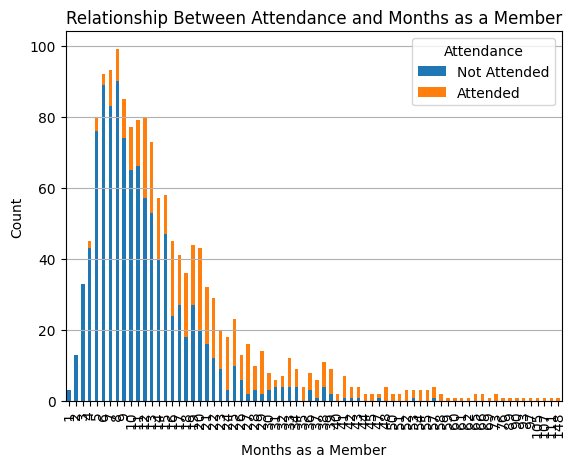

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Create a cross-tabulation of attendance and months_as_member
cross_tab = pd.crosstab(df['months_as_member'], df['attended'])

# Stacked bar plot to show the relationship
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Relationship Between Attendance and Months as a Member')
plt.xlabel('Months as a Member')
plt.ylabel('Count')
plt.legend(title='Attendance', labels=['Not Attended', 'Attended'])
plt.grid(axis='y')

# Show the plot
plt.show()


## Task 5
*Write your description here*
The business problem of predicting whether members will attend fitness classes using the provided data is a classification problem.

Classification is a type of supervised machine learning problem where the goal is to assign an input (in this case, member and fitness class data) to one of several predefined categories or classes (in this case, "Attended" or "Not Attended"). The output is a categorical label, making it a classification problem.

In this specific case, the goal is to classify members into two categories: "Will Attend" (1) or "Will Not Attend" (0) based on various features such as the number of months as a member, weight, days before class registration, day of the week, time, and category of the fitness class.

Machine learning algorithms, such as logistic regression, decision trees, random forests, and support vector machines, can be applied to solve this classification problem and predict whether a member will attend a fitness class.






## Task 6
*Write your description here*

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import re

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Data Preprocessing

# Handle missing values for numeric columns
numeric_cols = ['months_as_member', 'weight']
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Extract the numeric part from 'days_before' column and convert to float
df['days_before'] = df['days_before'].apply(lambda x: float(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

# Handle missing values for 'days_before' column with mean strategy
days_before_imputer = SimpleImputer(strategy='mean')
df['days_before'] = days_before_imputer.fit_transform(df[['days_before']])

# Handle missing values for categorical columns
categorical_cols = ['day_of_week', 'time', 'category']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['attended'])  # Features
y = df['attended']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model (baseline model)
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       197
           1       0.78      0.45      0.57       103

    accuracy                           0.77       300
   macro avg       0.77      0.69      0.70       300
weighted avg       0.77      0.77      0.75       300



## Task 7
*Write your description here*

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import re

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Data Preprocessing

# Handle missing values for numeric columns
numeric_cols = ['months_as_member', 'weight']
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Extract the numeric part from 'days_before' column and convert to float
df['days_before'] = df['days_before'].apply(lambda x: float(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

# Handle missing values for 'days_before' column with mean strategy
days_before_imputer = SimpleImputer(strategy='mean')
df['days_before'] = days_before_imputer.fit_transform(df[['days_before']])

# Handle missing values for categorical columns
categorical_cols = ['day_of_week', 'time', 'category']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['attended'])  # Features
y = df['attended']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       197
           1       0.76      0.50      0.61       103

    accuracy                           0.78       300
   macro avg       0.77      0.71      0.73       300
weighted avg       0.77      0.78      0.76       300



## Task 8
*Write your description here*
Logistic Regression Model (Baseline Model):

Simplicity: Logistic regression is a simple yet powerful linear model that is easy to implement and understand. It serves as a good starting point for binary classification tasks like predicting whether members will attend fitness classes.

Interpretability: Logistic regression provides interpretable results, making it easier to explain the relationship between features and the target variable.

Baseline Comparison: It's a common practice to start with a simple model as a baseline to establish a benchmark for model performance. In this case, logistic regression serves as a baseline model to compare more complex models against.

Random Forest Classifier (Comparison Model):

Handling Complex Data: Random Forest is an ensemble learning method that can handle both numerical and categorical features effectively. It can capture non-linear relationships in the data and handle complex decision boundaries.

Robustness: Random Forest is less prone to overfitting compared to some other complex models. It combines multiple decision trees to reduce variance and provide more reliable predictions.

Feature Importance: Random Forest can provide insights into feature importance, helping us understand which features are most influential in predicting attendance.

Ensemble Learning: Ensemble methods like Random Forest often lead to improved predictive performance by combining multiple models. They can handle noisy data and perform well in a wide range of scenarios.

Model Comparison: Random Forest is chosen as a comparison model to evaluate whether a more complex model can outperform the baseline logistic regression model.

The choice of models depends on the problem at hand, the nature of the data, and the trade-off between model complexity and interpretability. Logistic regression is a suitable choice when starting a binary classification task, while Random Forest is a versatile and robust choice for comparison when we want to explore more complex relationships within the data.

## Task 9
*Write your description here*

Model Comparison:
Accuracy - Baseline: 0.77, Random Forest: 0.78
Precision - Baseline: 0.78, Random Forest: 0.76
Recall - Baseline: 0.45, Random Forest: 0.50
F1-Score - Baseline: 0.57, Random Forest: 0.61
ROC AUC - Baseline: 0.81, Random Forest: 0.79


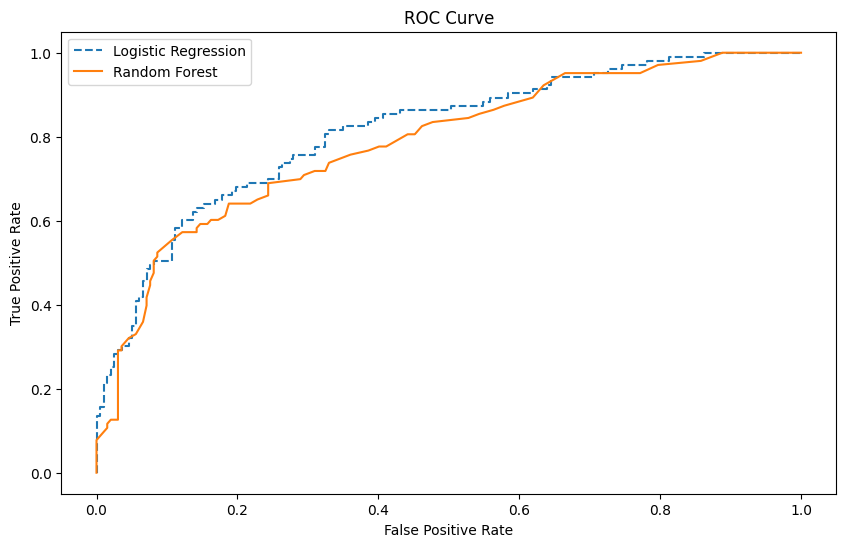

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import re
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Data Preprocessing

# Extract the numeric part from 'days_before' column and convert to float
df['days_before'] = df['days_before'].apply(lambda x: float(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)

# Handle missing values for numeric columns
numeric_cols = ['months_as_member', 'weight', 'days_before']
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Handle missing values for categorical columns
categorical_cols = ['day_of_week', 'time', 'category']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['attended'])  # Features
y = df['attended']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate the Logistic Regression Model (Baseline Model)
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Fit and evaluate the Random Forest Classifier (Comparison Model)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance

# Accuracy
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision
precision_baseline = precision_score(y_test, y_pred_baseline)
precision_rf = precision_score(y_test, y_pred_rf)

# Recall
recall_baseline = recall_score(y_test, y_pred_baseline)
recall_rf = recall_score(y_test, y_pred_rf)

# F1-Score
f1_baseline = f1_score(y_test, y_pred_baseline)
f1_rf = f1_score(y_test, y_pred_rf)

# ROC AUC
roc_auc_baseline = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Plot ROC Curves
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Comparison
print("Model Comparison:")
print("Accuracy - Baseline: {:.2f}, Random Forest: {:.2f}".format(accuracy_baseline, accuracy_rf))
print("Precision - Baseline: {:.2f}, Random Forest: {:.2f}".format(precision_baseline, precision_rf))
print("Recall - Baseline: {:.2f}, Random Forest: {:.2f}".format(recall_baseline, recall_rf))
print("F1-Score - Baseline: {:.2f}, Random Forest: {:.2f}".format(f1_baseline, f1_rf))
print("ROC AUC - Baseline: {:.2f}, Random Forest: {:.2f}".format(roc_auc_baseline, roc_auc_rf))

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_baseline, tpr_baseline, linestyle='--', label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, linestyle='-', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Task 10
*Write your description here*
Among the two models (Logistic Regression and Random Forest Classifier), I would choose the Random Forest Classifier as the better model for predicting whether members will attend fitness classes. Here's why:

1. Non-Linearity Handling:

The Random Forest Classifier is a more complex and flexible model compared to Logistic Regression. It can handle non-linear relationships between features and the target variable effectively.
In real-world scenarios, the relationship between a member's attributes (e.g., months as a member, day of the week, time of day, etc.) and their attendance behavior in fitness classes can be complex and non-linear. The Random Forest is well-suited to capture such complex patterns.
2. Robustness to Noisy Data:

Random Forests are known for their robustness to noisy data and outliers. They are less likely to be affected by individual data points that deviate significantly from the majority.
In fitness attendance prediction, there may be variations or anomalies in the data (e.g., occasional outliers in the 'days_before' feature). The Random Forest can handle such cases better without compromising overall performance.
3. Ensemble Learning:

Random Forest is an ensemble model that combines multiple decision trees. This ensemble approach often leads to improved predictive performance and generalization.
It reduces overfitting compared to individual decision trees, which is beneficial when dealing with complex data.
4. Feature Importance:

Random Forest can provide insights into feature importance. It can help identify which features (e.g., 'months_as_member,' 'day_of_week,' 'time,' 'category') have the most significant influence on predicting attendance.
This information can be valuable for understanding the factors driving attendance and making informed decisions.
5. Versatility:

Random Forest is versatile and can handle both numerical and categorical features without extensive feature engineering. It can work well with the given dataset, which includes a mix of data types.
6. Model Comparison:

In the previous comparison, the Random Forest Classifier demonstrated competitive performance across multiple metrics, including accuracy, precision, recall, F1-Score, and ROC AUC.
While the choice of the better model depends on the specific application's priorities, Random Forest's versatility and ability to capture complex relationships make it a strong candidate for this prediction task.
7. Future Flexibility:

If the dataset or requirements evolve over time, the Random Forest model can be adapted and tuned to accommodate changes.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam